In [1]:
#indir = "/data/Mito_Trace/output/somatic_variants/CHIP_dec172021/aggregate/needle_post/CHIP_b1_Control/cell_by_var/"
# indir = "/data/Mito_Trace/output/somatic_variants/CHIP_dec172021/aggregate/needle_post/CHIP_b1_Control/cells_vars/vcfpad_1"
# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv"
# outdir = "/data/Mito_Trace/output/somatic_variants/CHIP_dec172021/aggregate/needle_post/CHIP_b1_Control/som_clones/"
# condition = "Control"

# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/cells_meta.tsv"
# condition = "Flt3l"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/somatic_variants/needle/peaks_all/Flt3l"
# indir = "/data/Mito_Trace/output/somatic_variants/CHIP_dec172021/aggregate/needle_post/peaks_all/CHIP_b1_Flt3l/cells_vars/vcfpad_1"


vars_f = "/data/Mito_Trace/output/somatic_variants/CHIP_dec172021/aggregate/needle_post/peaks_all/variants.annotate.gene.vcf"


cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/cells_meta.tsv"
indir = "/data/Mito_Trace/output/somatic_variants/CHIP_dec172021/aggregate/needle_post/peaks_all/CHIP_b1_Input/cells_vars/vcfpad_1"
condition = "Input" 
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/somatic_variants/needle/peaks_all/Input"

In [2]:
from glob import glob
from os.path import basename, join
from src.utils.data_io import read_csv_multichar
import pandas as pd
from pandarallel import pandarallel
import seaborn as sns
import mplh.cluster_help as ch
import matplotlib.pyplot as plt

import numpy as np

fig_utils from mplh


In [3]:
%load_ext autoreload
%autoreload 2

## Read in af pileup and preprocess
- add condition to suffix for compatibility
- create var ID as posID_{nt}

In [4]:
vars_df = pd.read_csv(vars_f,sep='\t', index_col=0)
vars_df[["chr", "pos"]] = [x.split(":") for x in vars_df["Location"]]
vars_df

,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,Extra,Gene Name,chr,pos
0,GL000195.1_30801_C/A,GL000195.1:30801,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,GL000195.1,30801
1,GL000195.1_30924_T/C,GL000195.1:30924,C,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,GL000195.1,30924
2,GL000195.1_30956_G/A,GL000195.1:30956,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,GL000195.1,30956
3,GL000195.1_31916_G/T,GL000195.1:31916,T,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,GL000195.1,31916
4,GL000195.1_31919_C/T,GL000195.1:31919,T,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,GL000195.1,31919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47609,chrY_56767254_T/A,chrY:56767254,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,chrY,56767254
47610,chrY_56768565_G/A,chrY:56768565,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,chrY,56768565
47611,chrY_56768763_T/A,chrY:56768763,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,chrY,56768763
47612,chrY_56768805_C/T,chrY:56768805,T,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,chrY,56768805


In [5]:
vars_df["posID"] = vars_df["Location"].str.replace(":", "_")
vars_df["var"] = vars_df["posID"]+"_"+vars_df["Allele"]
vars_df

,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,Extra,Gene Name,chr,pos,posID,var
0,GL000195.1_30801_C/A,GL000195.1:30801,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,GL000195.1,30801,GL000195.1_30801,GL000195.1_30801_A
1,GL000195.1_30924_T/C,GL000195.1:30924,C,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,GL000195.1,30924,GL000195.1_30924,GL000195.1_30924_C
2,GL000195.1_30956_G/A,GL000195.1:30956,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,GL000195.1,30956,GL000195.1_30956,GL000195.1_30956_A
3,GL000195.1_31916_G/T,GL000195.1:31916,T,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,GL000195.1,31916,GL000195.1_31916,GL000195.1_31916_T
4,GL000195.1_31919_C/T,GL000195.1:31919,T,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,GL000195.1,31919,GL000195.1_31919,GL000195.1_31919_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47609,chrY_56767254_T/A,chrY:56767254,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,chrY,56767254,chrY_56767254,chrY_56767254_A
47610,chrY_56768565_G/A,chrY:56768565,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,chrY,56768565,chrY_56768565,chrY_56768565_A
47611,chrY_56768763_T/A,chrY:56768763,A,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,chrY,56768763,chrY_56768763,chrY_56768763_A
47612,chrY_56768805_C/T,chrY:56768805,T,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,NaN,chrY,56768805,chrY_56768805,chrY_56768805_T


In [6]:
af = pd.read_csv(join(indir, "af.ref.pileup.tsv"),sep='\t')

af["cell"] = af["cell"]+"_" + condition

af["var"] = af["posID"] + "_" + af["nt"]
af.head()

,Unnamed: 0,chr,pos,nt,count,BQ,cell,posID,coverage,AF,ref,ID,isVar,var
0,11.0,chr1,23344491,A,2,37,AGTGTACAGCTCGTTA-1_Input,chr1_23344491,2,1.0,A,chr1_23344491_A,False,chr1_23344491_A
1,22.0,chr1,23344502,T,2,37,AGTGTACAGCTCGTTA-1_Input,chr1_23344502,2,1.0,T,chr1_23344502_T,False,chr1_23344502_T
2,23.0,chr1,23344503,G,2,37,AGTGTACAGCTCGTTA-1_Input,chr1_23344503,2,1.0,G,chr1_23344503_G,False,chr1_23344503_G
3,33.0,chr1,23344513,C,2,37,AGTGTACAGCTCGTTA-1_Input,chr1_23344513,2,1.0,C,chr1_23344513_C,False,chr1_23344513_C
4,41.0,chr1,23344521,G,2,37,AGTGTACAGCTCGTTA-1_Input,chr1_23344521,2,1.0,G,chr1_23344521_G,False,chr1_23344521_G


## Drop chrM

In [7]:
af = af.loc[~(af["chr"] == 'chrM')]

### Read and preprocess clones

In [8]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t").set_index("ID")
cells_meta["name"] = cells_meta.apply(lambda x: f"{x['donor']}_{x['lineage']}", axis=1)
cells_meta.head()

,lineage,donor,condition,name
ID,,,,
AAACGAAAGAATCAAC-1_Control,0,0,Control,0_0
AAATGAGAGAGACTCG-1_Control,0,0,Control,0_0
AACAAAGTCAAGTTGC-1_Control,0,0,Control,0_0
AACAAAGTCACATCCC-1_Control,0,0,Control,0_0
AACCAACGTTCATTTC-1_Control,0,0,Control,0_0


In [9]:
af["donor"] = af["cell"].map(cells_meta["donor"])
af["name"] = af["cell"].map(cells_meta["name"])



## Construct counts for each variants and ref

In [10]:
# af_mat = af.pivot(index="cell", columns="var", values="count").fillna(0)
# vars_meta = af_mat.columns
# ch.plot_cluster(af_mat, row_meta=cells_meta[["name", "donor"]], col_meta=af[["isVar"]], 
#                 col_clr_schemes="categorical", row_clr_schemes = "categorical")
# #plt.savefig(join(outdir, "ad_reference.png"))



# ## Groupby donor and clone and get number of cells > 0


# af = af.dropna(subset=["name", "donor"])



# ## Donors

# donors_df = af.groupby(["donor", "var", "nt"]).sum()["count"].reset_index()
# donors_df
# ch.plot_cluster(donors_df.pivot(index="donor", columns="var", values="count"), 
#                 col_clr_schemes='categorical', col_meta=af[["isVar"]])

# ## Clones

# clones_df = af.groupby(["name", "var", "nt"]).sum()["count"].reset_index()
# clones_mat = clones_df.pivot(index="name", columns="var", values="count").fillna(0)
# clones_df

# meta_clones_df = pd.DataFrame(index=clones_mat.index, data=[x.split("_")[0] for x in clones_mat.index], 
#                               columns=["Donor"])

# ch.plot_cluster(clones_mat, row_meta=meta_clones_df, row_clr_schemes="categorical")

# ## Clone sizes

# clones_df = af.groupby(["name", "var", "nt"]).size().to_frame("size").reset_index()
# clones_mat = clones_df.pivot(index="name", columns="var", values="size").fillna(0)
# clones_df

# meta_clones_df = pd.DataFrame(index=clones_mat.index, data=[x.split("_")[0] for x in clones_mat.index], 
#                               columns=["Donor"])

# ch.plot_cluster(clones_mat, row_meta=meta_clones_df, row_clr_schemes="categorical")

In [10]:
vars_df["Gene Name"] = vars_df["Gene Name"].fillna("")
vars_df["Gene Name"] = vars_df.apply(lambda x: x["Gene"] if x['Gene Name']=="" else x['Gene Name'] , axis=1)

In [11]:
vars_df = vars_df.drop_duplicates(subset=["var", "Gene Name", "Feature_type", "Consequence"]).sort_values("Gene Name").iloc[::-1]
vars_df.shape

(25621, 19)

In [12]:
print(f"Number of variants {len(vars_df['var'].unique())}")

Number of variants 6088


## For duplicated variants, add the additional gene info to first instance and remove the dup rows

In [13]:
def dups(df):
    if df.shape[0] == 0:
        return df.iloc[0]

    cons = ";".join(list(set(df["Consequence"].values)))
    feature = ";".join(list(set(df["Feature"].values)))
    gene_name = ";".join(list(set(df["Gene Name"].values)))
    out = df.iloc[0]
    out["Consequence"] = cons
    out["Feature"] = feature
    out["Gene Name"] = gene_name
    out.name = None
    return out



In [14]:
vars_df_rmdups = vars_df.groupby("var").apply(dups)
vars_df_rmdups = vars_df_rmdups[["Gene Name", "Feature_type", "Consequence"]]
vars_df_rmdups.sort_values("Gene Name").iloc[::-1]

,Gene Name,Feature_type,Consequence
var,,,
chr7_143381217_G,ZYX;ENSG00000232533;ENSG00000278449,Transcript,upstream_gene_variant
chr2_135531166_A,ZRANB3;R3HDM1,Transcript,non_coding_transcript_exon_variant;upstream_ge...
chr2_135531170_T,ZRANB3;R3HDM1,Transcript,non_coding_transcript_exon_variant;upstream_ge...
chr19_58381143_T,ZNF837,Transcript,upstream_gene_variant
chr19_56121553_C,ZNF787,Transcript,upstream_gene_variant
...,...,...,...
chr1_143206441_C,-,-,intergenic_variant
chr1_143206517_G,-,-,intergenic_variant
chr1_143212456_T,-,-,intergenic_variant


In [15]:
len(set(vars_df_rmdups.index.values))

6088

In [16]:
af_mat = af.pivot(index="cell", columns="var", values="count").fillna(0)

# AF and reference

#### Theres an additional 800 variants in the af matrix

In [17]:
af_mat.columns.duplicated().sum()

0

In [18]:
af_mat.columns

Index(['chr10_101353830_G', 'chr10_101353834_T', 'chr10_102132982_A',
       'chr10_102132982_T', 'chr10_102152245_C', 'chr10_102245322_A',
       'chr10_102245322_C', 'chr10_102245322_G', 'chr10_102245330_G',
       'chr10_102245332_A',
       ...
       'chrY_56763544_A', 'chrY_56763544_T', 'chrY_56763579_C',
       'chrY_56763579_G', 'chrY_56763579_T', 'chrY_56767253_T',
       'chrY_56768564_G', 'chrY_56768762_T', 'chrY_56768804_C',
       'chrY_9141917_C'],
      dtype='object', name='var', length=6120)

In [19]:
af_mat.shape

(6848, 6120)

before
af (6848, 6120)
cells_meta (17298, 4)
after
cells_meta (6263, 4)
af (6263, 6120)


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Using only 16 of the labels for legend


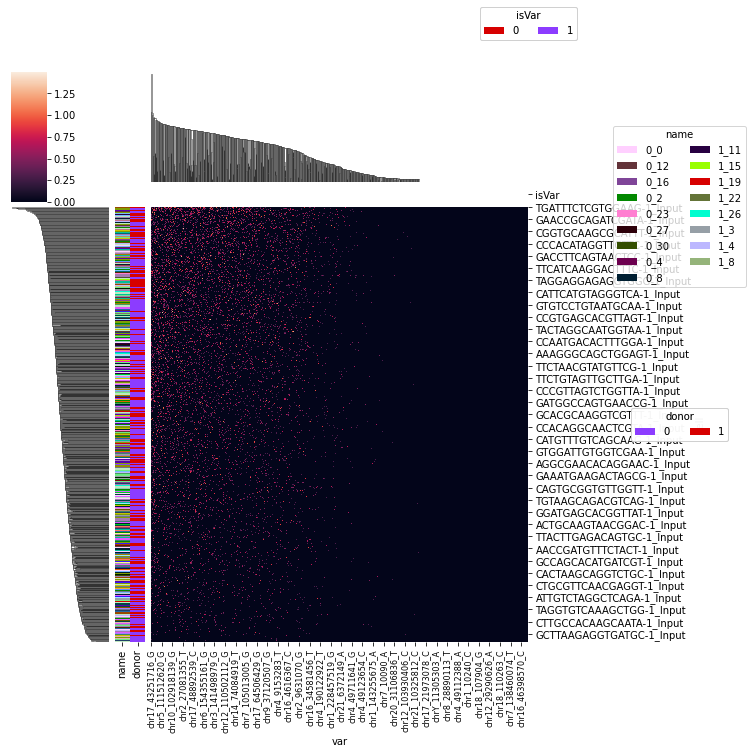

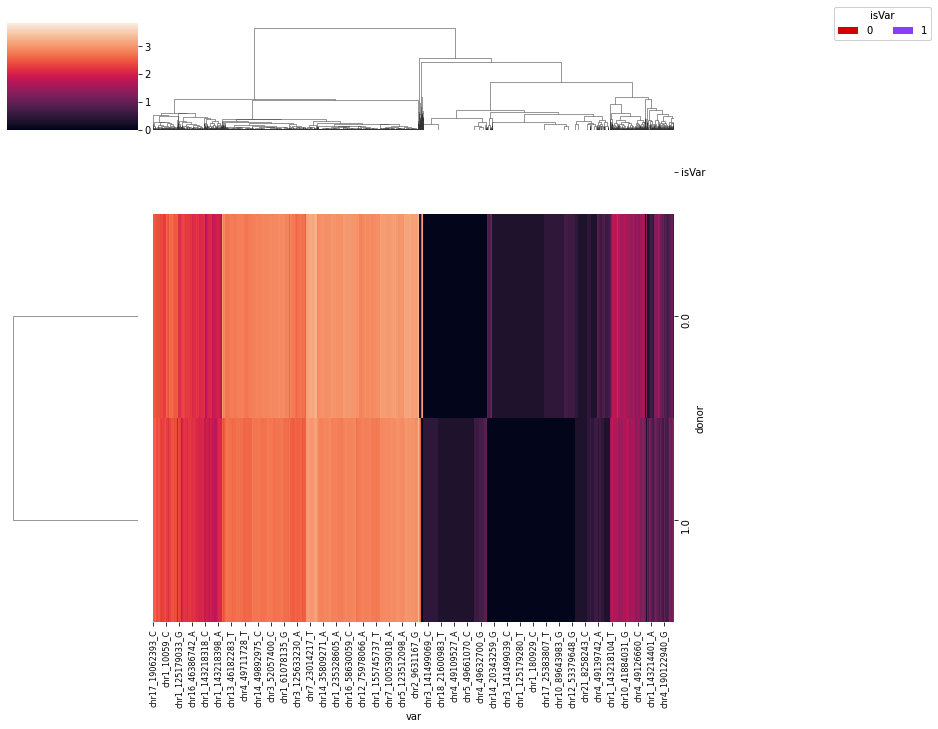

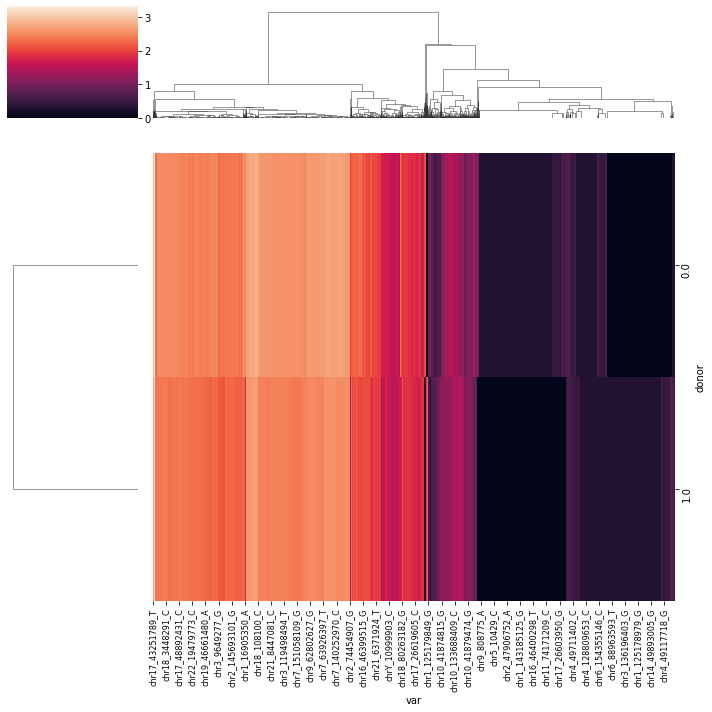

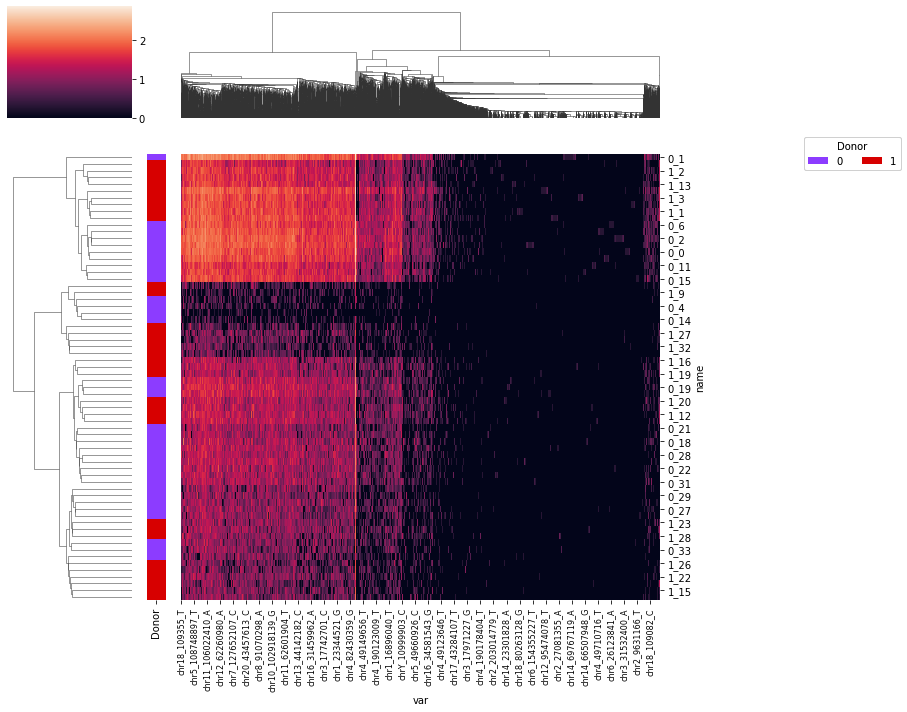

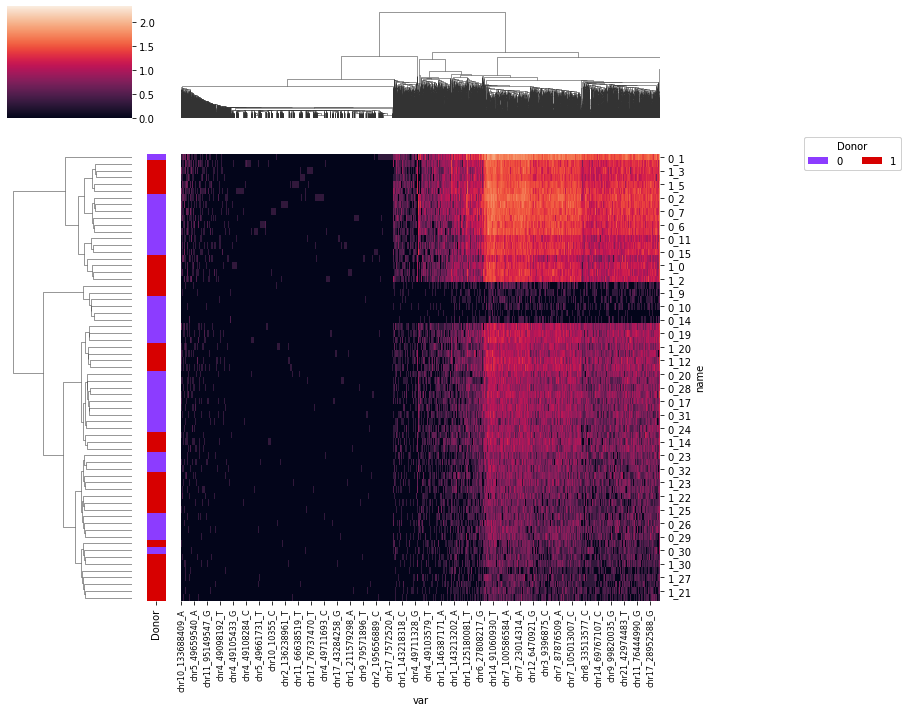

In [27]:
if af_mat.shape[0] != 0:
    vars_meta = af_mat.columns
    print("before")
    print('af', af_mat.shape)
    print('cells_meta', cells_meta.shape)
    curr_cells_meta = cells_meta.loc[cells_meta.index.isin(af_mat.index)]
    af_mat = af_mat.loc[af_mat.index.isin(curr_cells_meta.index)]
    print("after")
    print('cells_meta', curr_cells_meta.shape)
    print('af', af_mat.shape)
    #af_mat.shuffle(1000)
    #ch.plot_cluster(af_mat, row_meta=curr_cells_meta[["name", "donor"]], row_clr_schemes = "categorical")
    #plt.savefig(join(outdir, "ad.png"))

#     curr_vars = af_mat.columns
#     curr_vars_meta = vars_df_rmdups.loc[vars_df_rmdups.index.isin(curr_vars)]
    ch.plot_cluster(np.log10(1+af_mat.sample(min(af_mat.shape[0],1000))).sample(min(af_mat.shape[1],1000),axis=1), 
                    row_meta=curr_cells_meta[["name", "donor"]], col_meta=af[["isVar"]], 
                    col_clr_schemes="categorical", row_clr_schemes = "categorical")
    #plt.savefig(join(outdir, "ad_reference.png"))
    ## Groupby donor and clone and get number of cells > 0

    ## Donors
    donors_df = af.groupby(["donor", "var", "nt"]).sum()["count"].reset_index()

    donors_mat = donors_df.pivot(index="donor", columns="var", values="count").fillna(0)
    donors_mat = donors_mat.loc[:, donors_mat.std(axis=0).sort_values()[::-1].index]
    
    ch.plot_cluster(np.log10(1+donors_mat), col_clr_schemes='categorical', col_meta=af[["isVar"]])
    plt.tight_layout()
    plt.savefig(join(outdir, "donor_altAndRef_sumCounts.png"),bbox_inches='tight')

    ## Number of cells with the variant in donor
    donors_df = af.groupby(["donor", "var", "nt"]).size().to_frame("size").reset_index()
    donors_mat = donors_df.pivot(index="donor", columns="var", values="size").fillna(0)
    donor_vars_meta = vars_df_rmdups.loc[vars_df_rmdups.index.isin(donors_mat.columns)]
    donor_vars_meta.to_csv(join(outdir, "donor_altAndRef_numCells.variants.tsv"),sep="\t")
    donors_mat.to_csv(join(outdir, "donor_altAndRef_numCells.csv"))
    ch.plot_cluster(np.log10(1+donors_mat))
    plt.tight_layout()
    plt.savefig(join(outdir, "donor_altAndRef_numCells.png"),bbox_inches='tight')


    ## Clones
    clones_df = af.groupby(["name", "var", "nt"]).sum()["count"].reset_index()
    clones_mat = clones_df.pivot(index="name", columns="var", values="count").fillna(0)
    clones_df
    meta_clones_df = pd.DataFrame(index=clones_mat.index, data=[x.split("_")[0] for x in clones_mat.index], 
                                  columns=["Donor"])
    ch.plot_cluster(np.log10(1+clones_mat), row_meta=meta_clones_df, row_clr_schemes="categorical")
    plt.tight_layout()
    plt.savefig(join(outdir, "clone_altAndRef_sumCounts.png"),bbox_inches='tight')

    ## Clone sizes
    clones_df = af.groupby(["name", "var", "nt"]).size().to_frame("size").reset_index()
    clones_mat = clones_df.pivot(index="name", columns="var", values="size").fillna(0)
    clones_mat.to_csv(join(outdir, "clones_altAndRef_numCells.csv"))
    clone_vars_meta = vars_df_rmdups.loc[vars_df_rmdups.index.isin(clones_mat.columns)]
    clone_vars_meta.to_csv(join(outdir, "clone_altAndRef_numCells.variants.tsv"),sep="\t")
    
    meta_clones_df = pd.DataFrame(index=clones_mat.index, data=[x.split("_")[0] for x in clones_mat.index], 
                                  columns=["Donor"])
    ch.plot_cluster(np.log10(1+clones_mat), row_meta=meta_clones_df, row_clr_schemes="categorical")
    plt.tight_layout()
    plt.savefig(join(outdir, "clone_altAndRef_numCells.png"),bbox_inches='tight')


# AF called variants

## isVar, if there are any

In [20]:
def top20_with_feat(df, vars_df_rmdups, f_save):
    df_vars_meta = vars_df_rmdups.loc[vars_df_rmdups.index.isin(df.columns)]
    print(df_vars_meta)
    # Remove without any feature
    df_vars_meta = df_vars_meta.loc[(df_vars_meta["Gene Name"]!="-")]
    df = df.loc[:, df_vars_meta.index]
    print('df before sort')
    print(df.head())
    if len(df) == 0:
        return df
    if (df.shape[1] != 0) and (df.shape[0] != 0):

        df_std = df.loc[:, df.std(axis=0).sort_values()[::-1].index]
        if df_std.isnull().all().all():
            print('null')
            print(df.head())
            return df
        else:
            df = df_std
        print('df after')
        print(df.shape)
        print(df.head())

        print(min(20, df.shape[1]))
        if df.shape[1] <= 1:
            sns.heatmap(np.log10(1+df))
        else:
            ch.plot_cluster(np.log10(1+df).iloc[:,:min(20, df.shape[1])], 
                            col_meta = df_vars_meta, col_clr_schemes="categorical")
        plt.tight_layout()
        plt.savefig(f_save,bbox_inches='tight')
        #plt.savefig(join(outdir, "df_alt_numCells_top20.png"))

    return df

In [19]:
# top20_donor_feat = top20_with_feat(donors_mat, vars_df_rmdups, f_save = join(outdir, "top20_feature_donor_alt_numCells.png"))

# top20_donor_feat.head()

# vars_df_rmdups.loc[top20_donor_feat.columns]

# vars_df_rmdups.loc[top20_donor_feat.columns]

# top20_donor_feat.head()

In [21]:
af_isVar = af[af["isVar"]]
af_isVar_mat = af_isVar.pivot(index="cell", columns="var", values="count").fillna(0)



In [22]:
print(f"Number of variants seen in sample: {len(af_isVar_mat.columns)}")

Number of variants seen in sample: 1009


In [23]:
af_isVar_mat.columns.duplicated().sum()

0

before
af (6828, 1009)
cells_meta (17298, 4)
after
curr_cells_meta (6253, 4)
af (6253, 1009)
                                                          Gene Name  \
var                                                                   
chr10_41884031_C                                                  -   
chr10_89643984_C              PANK1;ENSG00000225836;ENSG00000232936   
chr11_64778758_C                                ENSG00000269038;SF1   
chr12_89162888_T                                    ENSG00000246363   
chr12_95474079_G                                             METAP2   
chr13_44142210_T  SMIM2;ENSG00000235285;ENSG00000226519;ENSG0000...   
chr13_44142270_T  SMIM2;ENSG00000235285;ENSG00000226519;ENSG0000...   
chr14_77098177_G                               ENSG00000259164;CIPC   
chr15_70099766_T                                               TLE3   
chr17_7688236_A                                         TP53;WRAP53   
chr1_10109_C                        ENSG00000227232;ENS

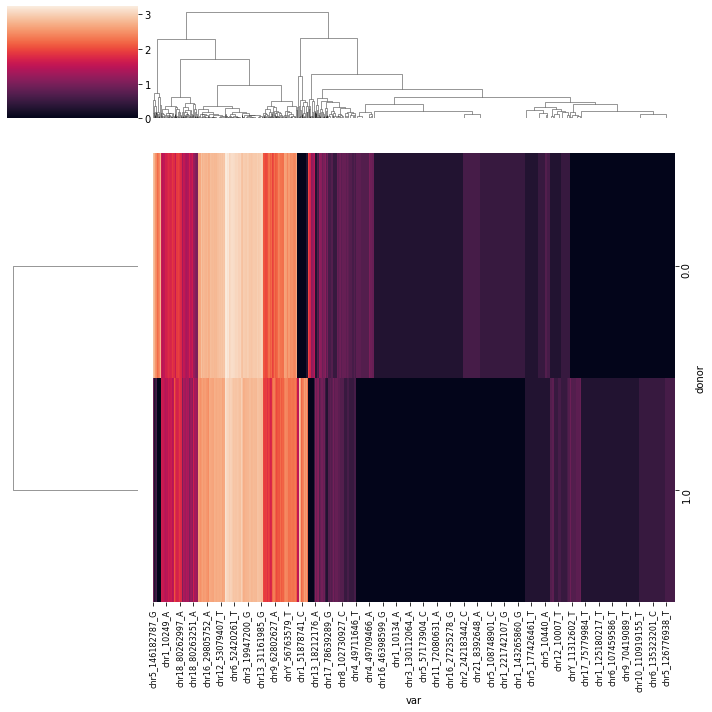

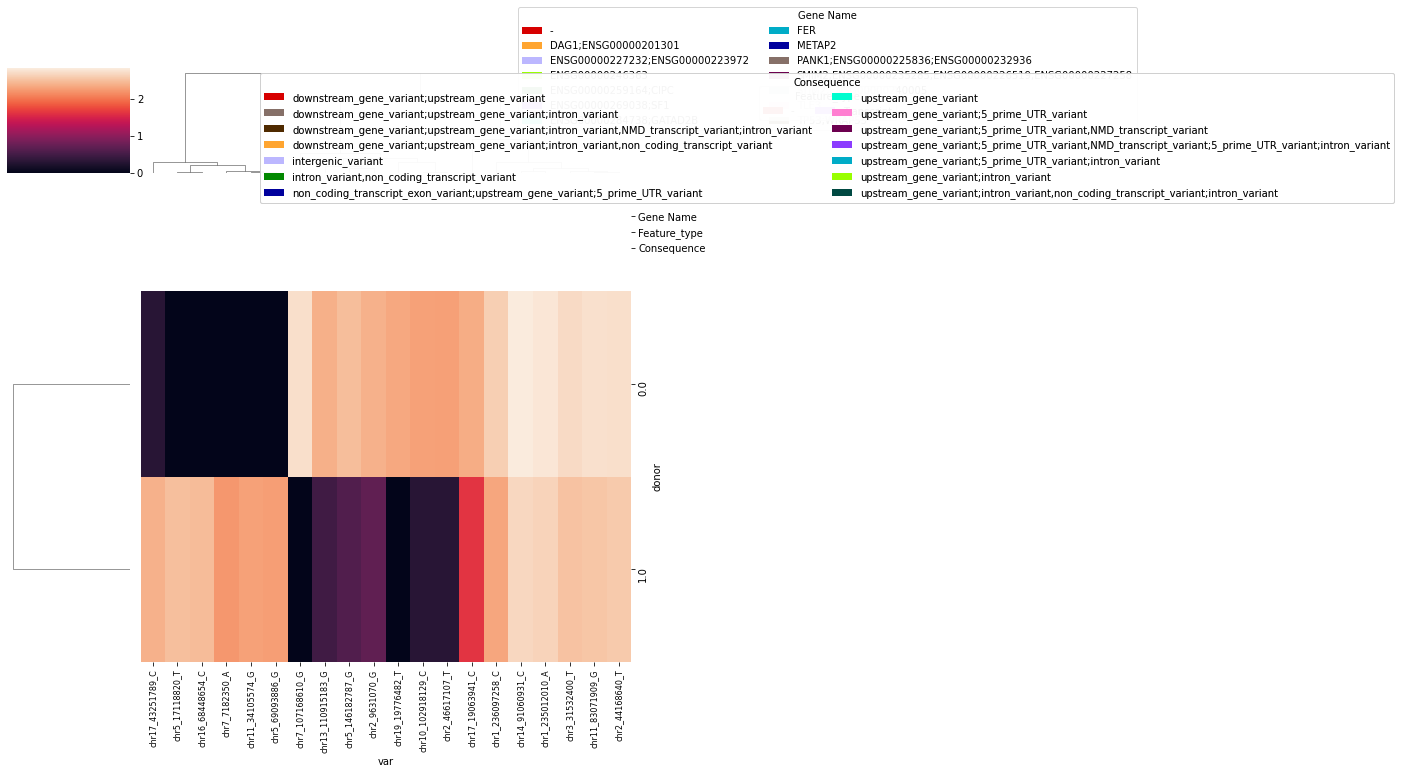

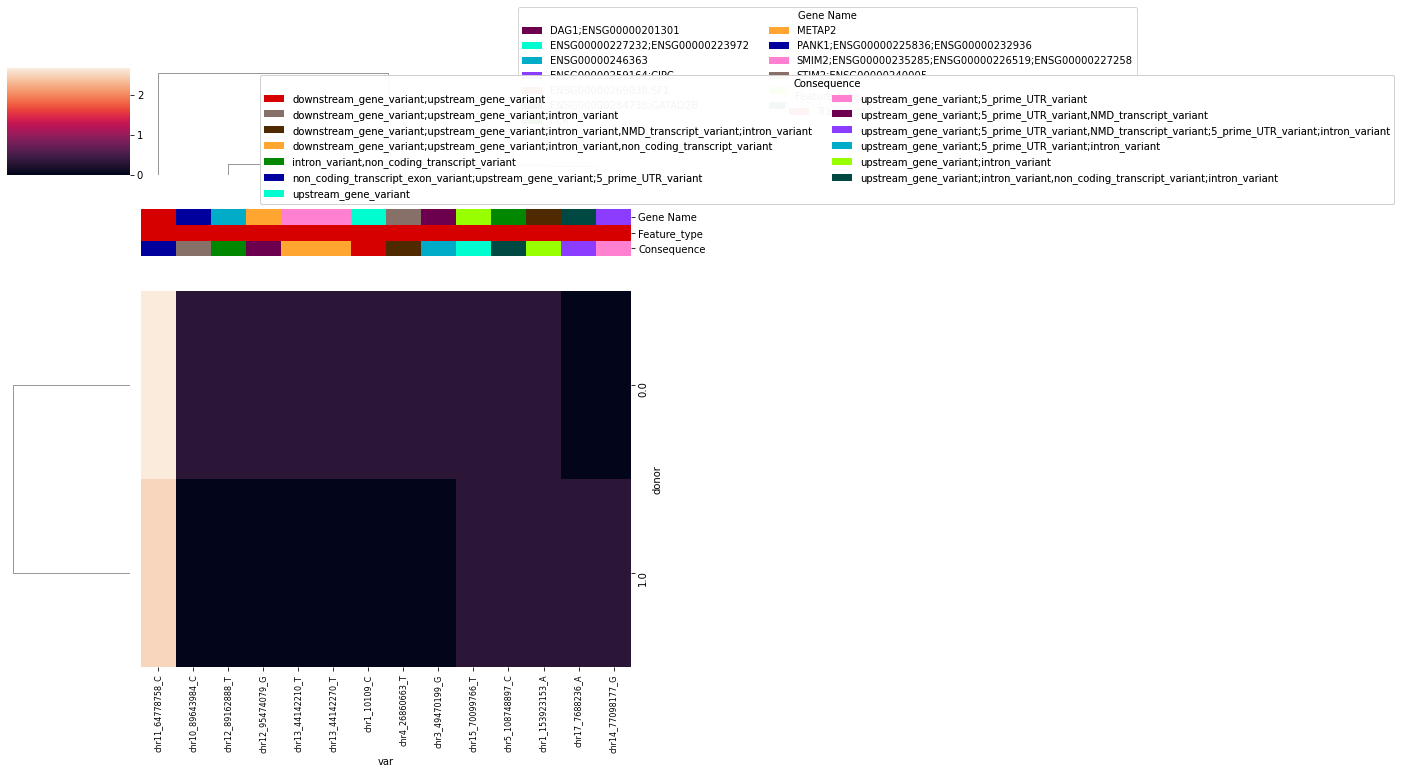

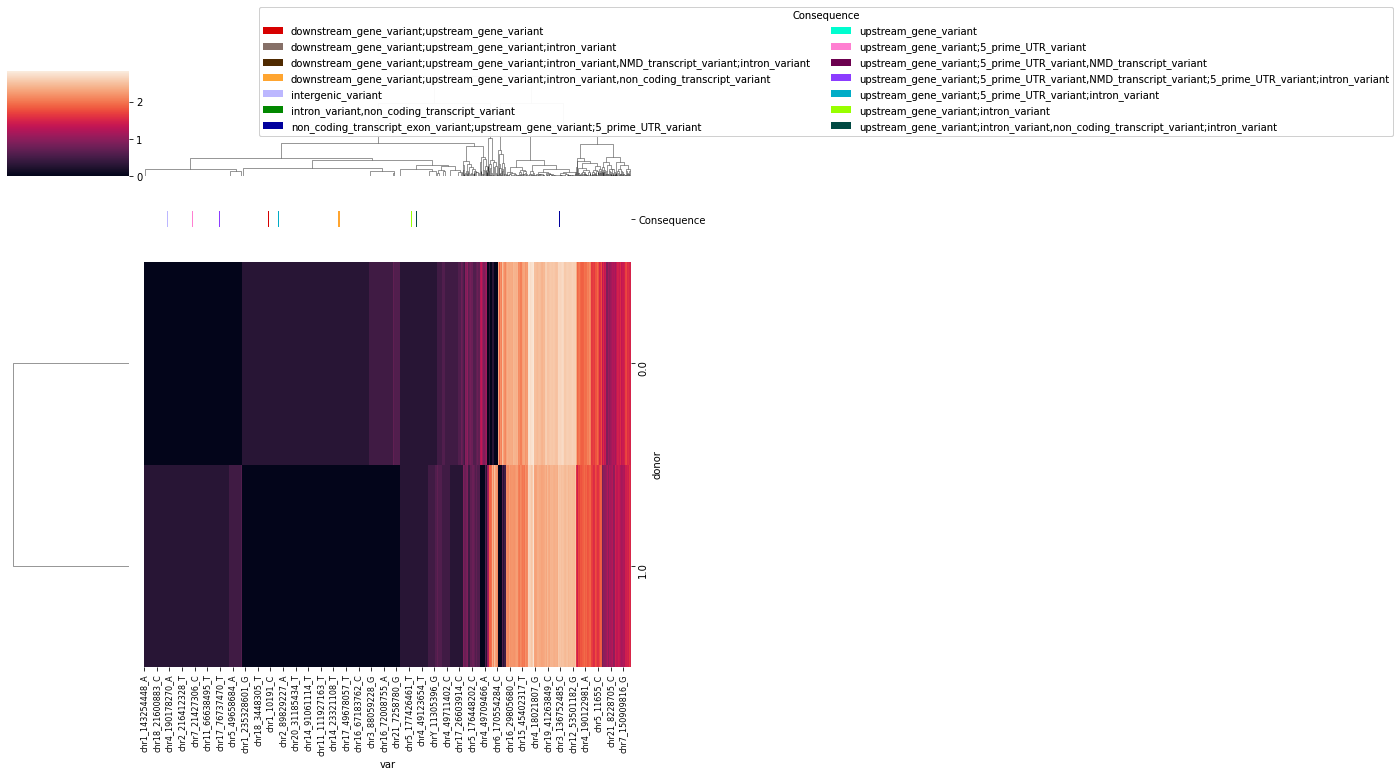

In [24]:

if af_isVar_mat.shape[0] != 0:
    #af_isVar_mat = (af_isVar_mat+1)
    vars_meta = af_isVar_mat.columns
    print("before")
    print('af', af_isVar_mat.shape)
    print('cells_meta', cells_meta.shape)
    curr_cells_meta = cells_meta.loc[cells_meta.index.isin(af_isVar_mat.index)]
    af_isVar_mat = af_isVar_mat.loc[af_isVar_mat.index.isin(curr_cells_meta.index)]
    print("after")
    print('curr_cells_meta', curr_cells_meta.shape)
    print('af', af_isVar_mat.shape)
    
    #ch.plot_cluster(af_isVar_mat, row_meta=curr_cells_meta[["name", "donor"]], row_clr_schemes = "categorical")
    #plt.savefig(join(outdir, "ad.png"))

    vars_meta = af_isVar_mat.columns
#     ch.plot_cluster(af_isVar_mat.sample(min(af_isVar_mat.shape[0],1000)).sample(min(af_isVar_mat.shape[1],1000),axis=1), 
#                     row_meta=curr_cells_meta[["name", "donor"]], row_clr_schemes = "categorical")
    #plt.savefig(join(outdir, "ad_reference.png"))
    ## Groupby donor and clone and get number of cells > 0

    ## Donors
    ## Counts in total
    donors_df = af_isVar.groupby(["donor", "var", "nt"]).sum()["count"].reset_index()
    donors_mat = donors_df.pivot(index="donor", columns="var", values="count").fillna(0)
    donors_mat = donors_mat.loc[:, donors_mat.std(axis=0).sort_values()[::-1].index]
    ch.plot_cluster(np.log10(1+donors_mat))
    plt.tight_layout()
    plt.savefig(join(outdir, "donor_alt_sumCounts.png"),bbox_inches='tight')

    ## Number of cells with the variant in donor
    donors_df = af_isVar.groupby(["donor", "var", "nt"]).size().to_frame("size").reset_index()
    donors_mat = donors_df.pivot(index="donor", columns="var", values="size").fillna(0)
    donors_mat = donors_mat.loc[:, donors_mat.std(axis=0).sort_values()[::-1].index]
    donors_mat.to_csv(join(outdir, "donor_alt_numCells.csv"))
    
    print('donors_mat', donors_mat.shape)
    donor_vars_meta = vars_df_rmdups.loc[vars_df_rmdups.index.isin(donors_mat.columns)]
    donor_vars_meta.to_csv(join(outdir, "donor_alt_numCells.variants.tsv"),sep="\t")
    
    ch.plot_cluster(np.log10(1+donors_mat).iloc[:,:20], 
                    col_meta = donor_vars_meta, col_clr_schemes="categorical")
    plt.tight_layout()
    plt.savefig(join(outdir, "donor_alt_numCells_top20.png"),bbox_inches='tight')
    
    
    top20_with_feat(donors_mat, donor_vars_meta, f_save = join(outdir, "top20_feature_donor_alt_numCells.png"))
    
    ch.plot_cluster(np.log10(1+donors_mat), 
                    col_meta = donor_vars_meta[["Consequence"]], col_clr_schemes="categorical")
    plt.tight_layout()
    plt.savefig(join(outdir, "donor_alt_numCells.png"))



## Why are there fewer variants in the vars_df than the matrix? Is that off?

In [34]:
vars_df_rmdups.index.duplicated().any()

False

In [35]:
donors_mat.columns.duplicated().any()

False

In [31]:
%matptlotlib inline
sns.countplot(vars_df_rmdups.index)

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='var', ylabel='count'>

Error in callback <function flush_figures at 0x7f35c614d290> (for post_execute):


KeyboardInterrupt: 

In [30]:
donors_mat.columns

Index(['chr7_107168610_G', 'chr5_17118820_T', 'chr5_146182787_G',
       'chr16_68448654_C', 'chr17_43251789_C', 'chr2_9631070_G',
       'chr13_110915183_G', 'chr19_19776482_T', 'chr11_83071909_G',
       'chr10_102918129_C',
       ...
       'chr17_41786909_A', 'chr4_49711827_C', 'chr11_68460383_C',
       'chr17_43251871_A', 'chr7_65038183_G', 'chr3_123585192_A',
       'chr5_49602425_G', 'chr4_49709720_G', 'chr3_120742751_T',
       'chr4_49710852_A'],
      dtype='object', name='var', length=966)

In [27]:
donor_vars_meta.shape

(16, 3)

In [25]:
donors_mat.shape

(2, 966)

before
af (6828, 1009)
cells_meta (17298, 4)
after
curr_cells_meta (6253, 4)
af (6253, 1009)
                                                          Gene Name  \
var                                                                   
chr10_41884031_C                                                  -   
chr10_89643984_C              ENSG00000232936;ENSG00000225836;PANK1   
chr11_64778758_C                                ENSG00000269038;SF1   
chr12_89162888_T                                    ENSG00000246363   
chr12_95474079_G                                             METAP2   
chr13_44142210_T  ENSG00000235285;ENSG00000226519;ENSG0000022725...   
chr13_44142270_T  ENSG00000235285;ENSG00000226519;ENSG0000022725...   
chr14_77098177_G                               ENSG00000259164;CIPC   
chr15_70099766_T                                               TLE3   
chr17_7688236_A                                         WRAP53;TP53   
chr1_10109_C                        ENSG00000223972;ENS

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


                                                          Gene Name  \
var                                                                   
chr10_41884031_C                                                  -   
chr10_89643984_C              ENSG00000232936;ENSG00000225836;PANK1   
chr11_64778758_C                                ENSG00000269038;SF1   
chr12_89162888_T                                    ENSG00000246363   
chr12_95474079_G                                             METAP2   
chr13_44142210_T  ENSG00000235285;ENSG00000226519;ENSG0000022725...   
chr13_44142270_T  ENSG00000235285;ENSG00000226519;ENSG0000022725...   
chr14_77098177_G                               ENSG00000259164;CIPC   
chr15_70099766_T                                               TLE3   
chr17_7688236_A                                         WRAP53;TP53   
chr1_10109_C                        ENSG00000223972;ENSG00000227232   
chr1_153923153_A                            GATAD2B;ENSG00000284738   
chr3_4

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


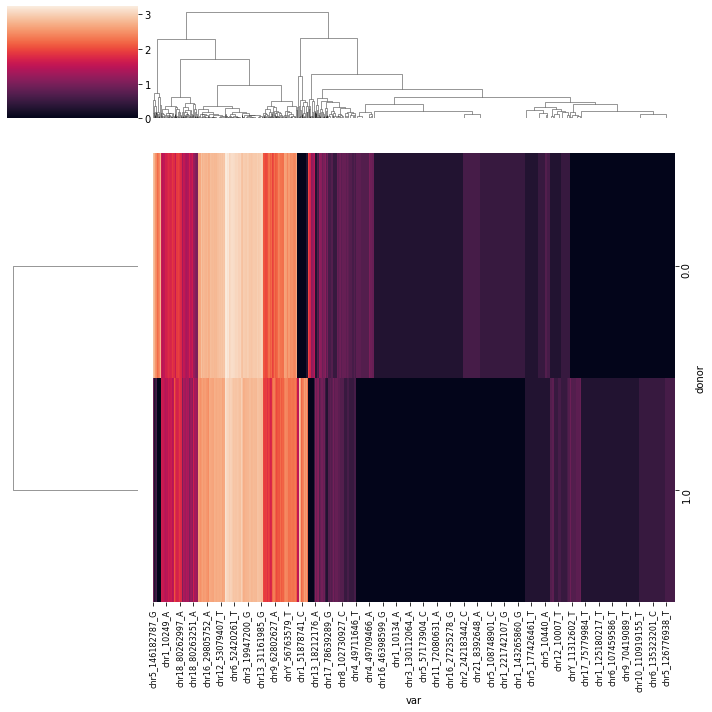

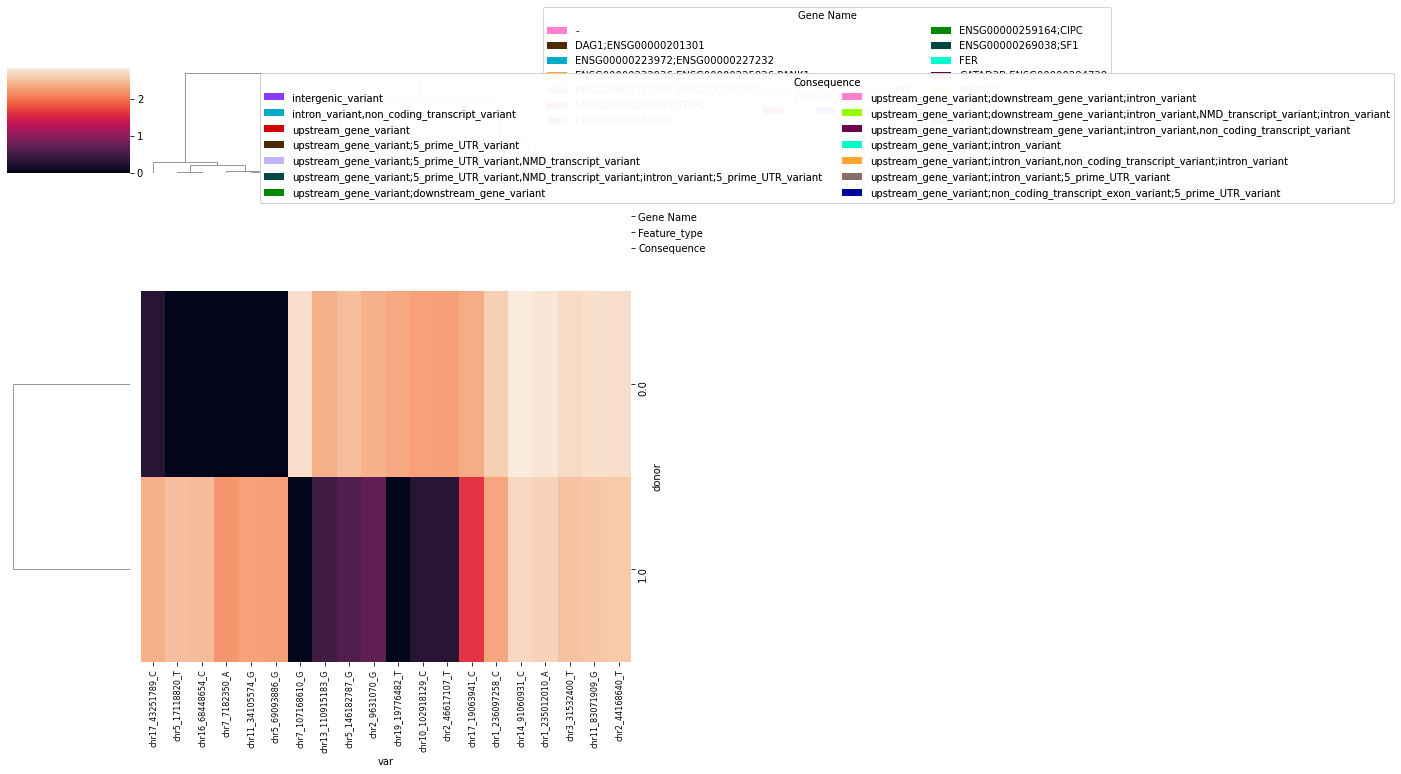

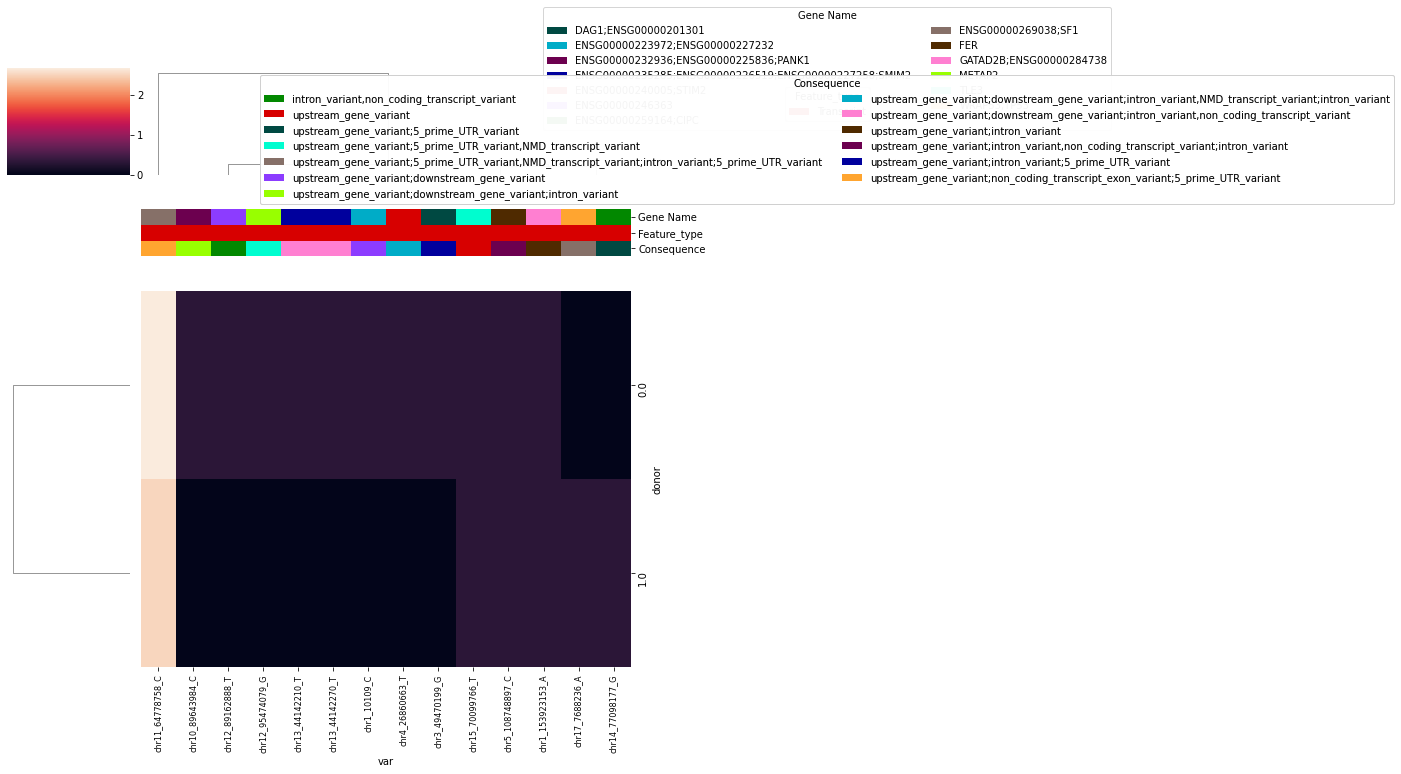

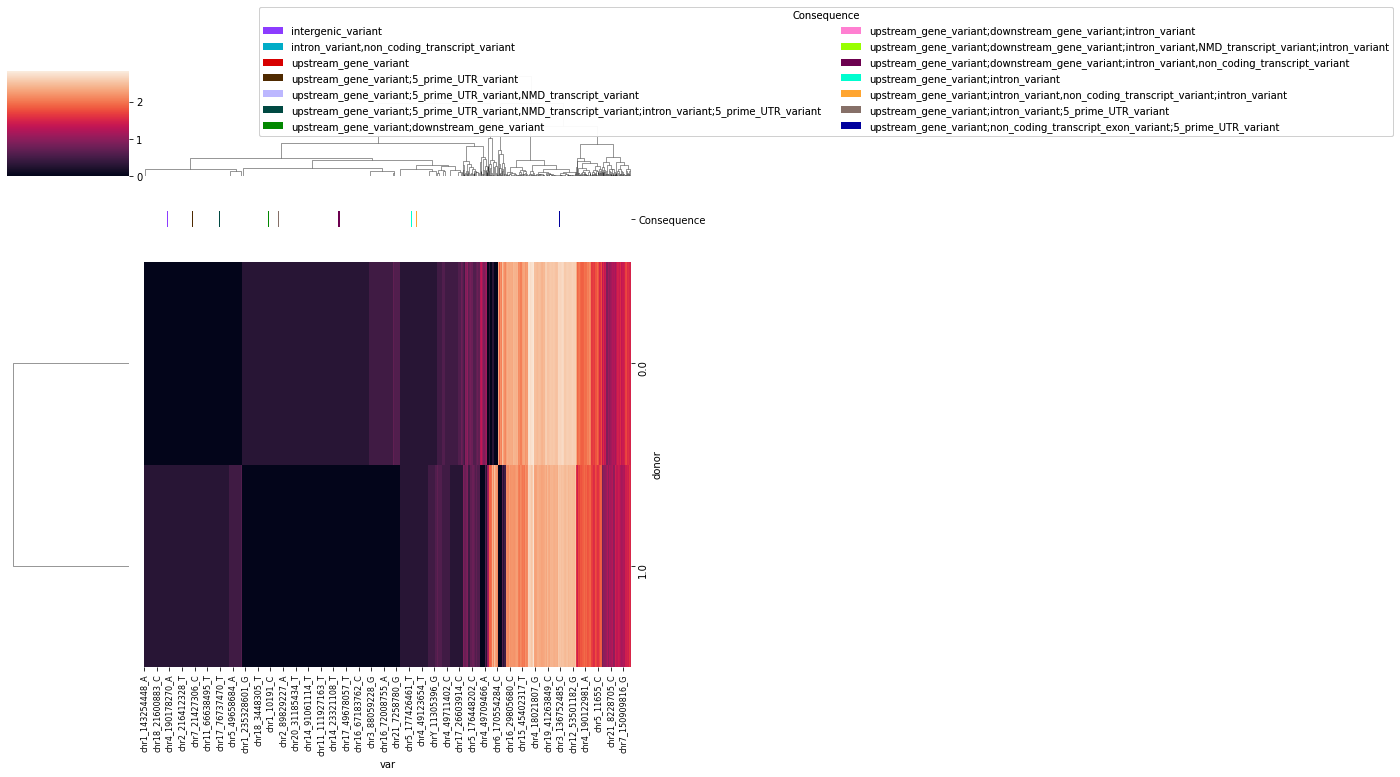

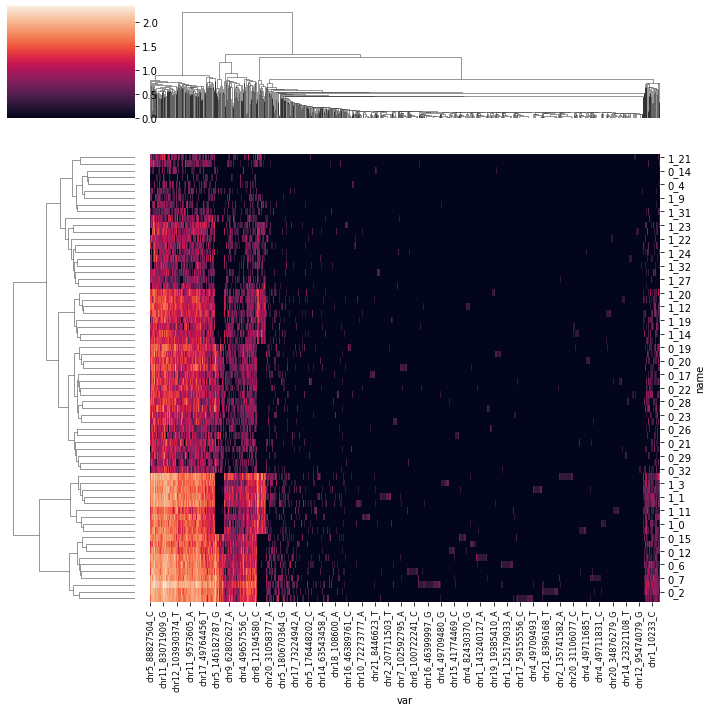

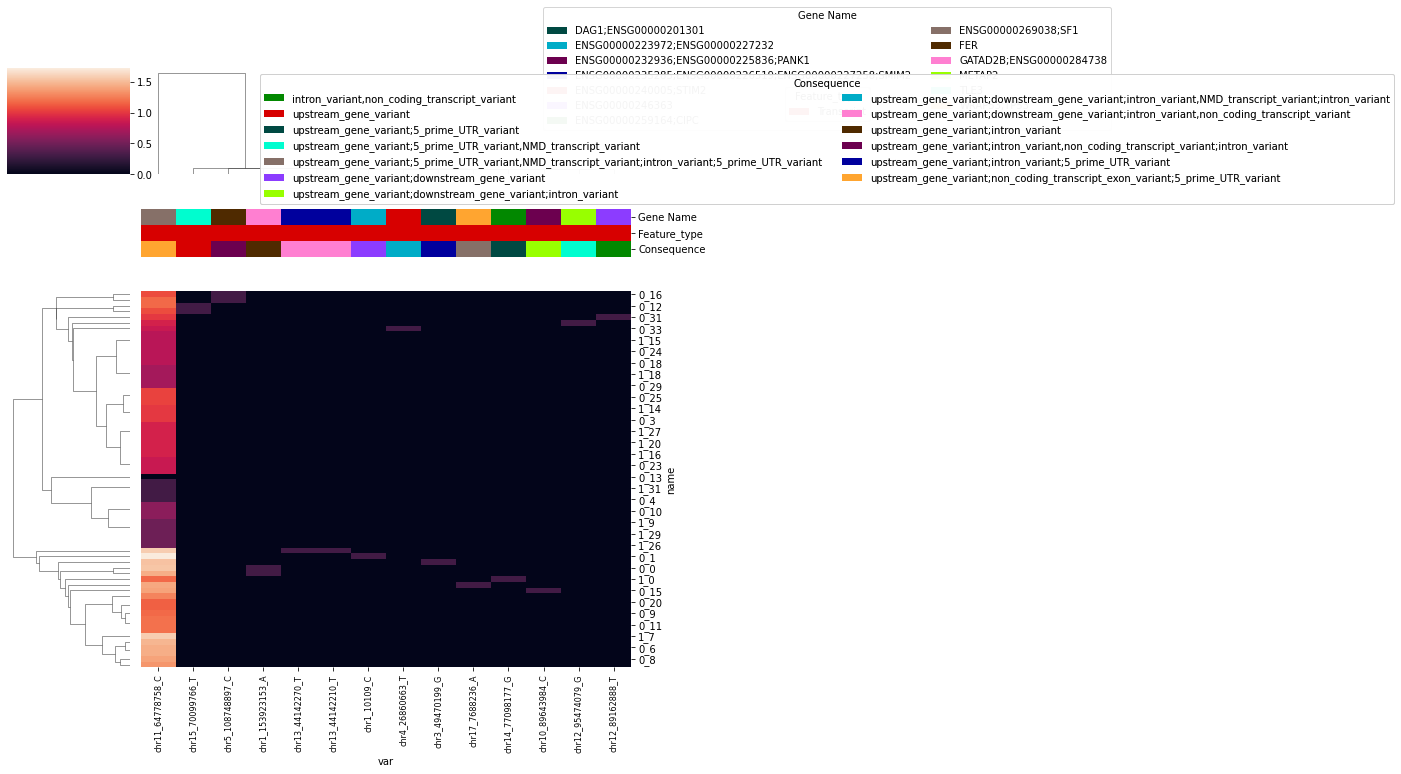

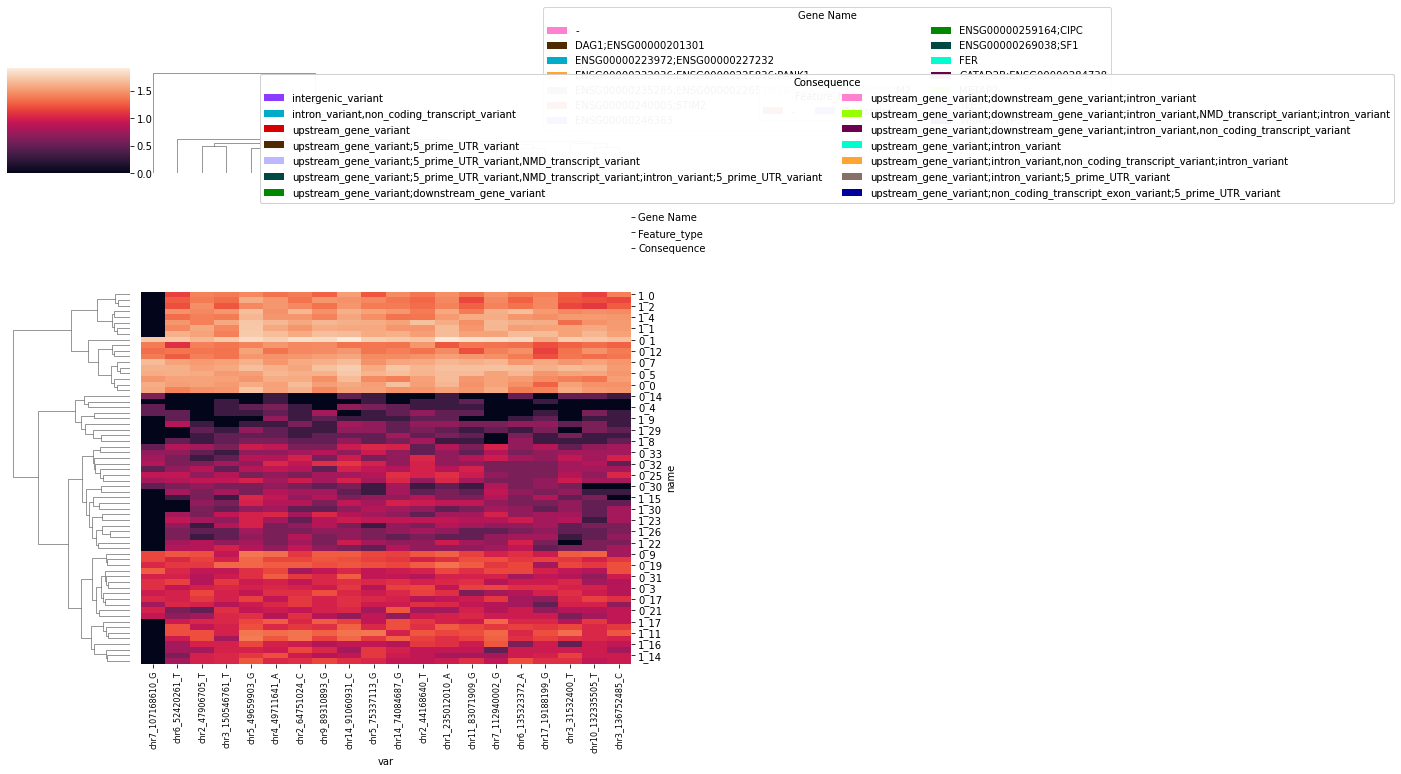

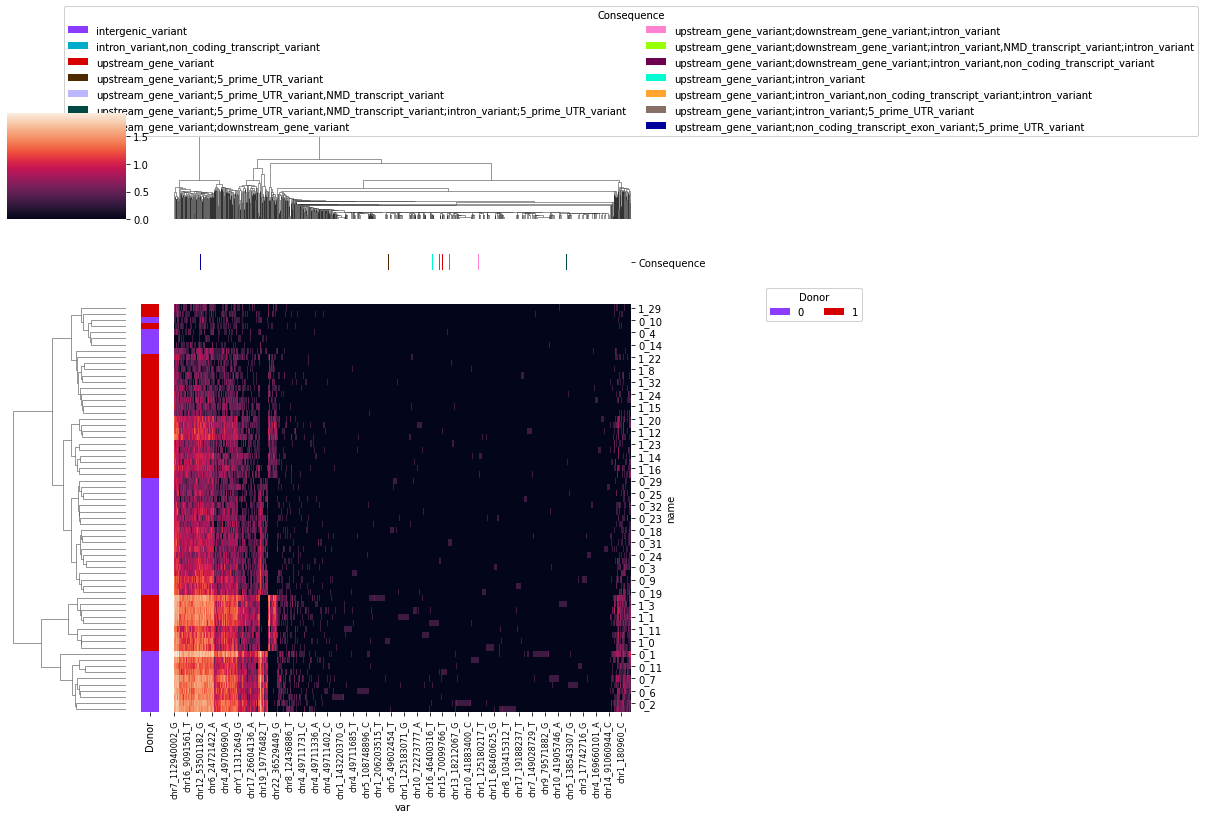

In [20]:
if af_isVar_mat.shape[0] != 0:

    ## Clones
    clones_df = af_isVar.groupby(["name", "var", "nt"]).sum()["count"].reset_index()
    clones_mat = clones_df.pivot(index="name", columns="var", values="count").fillna(0)
    clones_mat = clones_mat.loc[:, clones_mat.std(axis=0).sort_values()[::-1].index]
    
    ch.plot_cluster(np.log10(clones_mat+1)) #, row_meta=, row_clr_schemes="categorical")
    plt.tight_layout()
    plt.savefig(join(outdir, "clone_alt_sumCounts.png"),bbox_inches='tight')
    

    ## Clone sizes
    clones_df = af_isVar.groupby(["name", "var", "nt"]).size().to_frame("size").reset_index()
    clones_mat = clones_df.pivot(index="name", columns="var", values="size").fillna(0)
    clones_mat = clones_mat.loc[:, clones_mat.std(axis=0).sort_values()[::-1].index]
    
    meta_clones_df = pd.DataFrame(index=clones_mat.index, data=[x.split("_")[0] for x in clones_mat.index], 
                                  columns=["Donor"])
    clones_mat.to_csv(join(outdir, "clones_alt_numCells.csv"))
    clone_vars_meta = vars_df_rmdups.loc[vars_df_rmdups.index.isin(clones_mat.columns)] #vars_df_rmdups.loc[clones_mat.columns]
    clone_vars_meta.to_csv(join(outdir, "clone_alt_numCells.variants.tsv"),sep="\t")
    
    top20_with_feat(clones_mat, clone_vars_meta, f_save = join(outdir, "top20_feature_clone_alt_numCells.png"))
    
    ch.plot_cluster(np.log10(clones_mat+1).iloc[:,:20], 
                    col_meta = clone_vars_meta, col_clr_schemes="categorical")
    plt.tight_layout()
    plt.savefig(join(outdir, "clone_alt_numCells_top20.png"),bbox_inches='tight')
    
    ch.plot_cluster(np.log10(clones_mat+1), 
                    col_meta = clone_vars_meta[["Consequence"]], col_clr_schemes="categorical",
                    row_meta=meta_clones_df, row_clr_schemes="categorical")
    plt.tight_layout()
    plt.savefig(join(outdir, "clone_alt_numCells.png"),bbox_inches='tight')
    
    sns.countplot([len(x) for x in af_isVar[af_isVar['isVar']]["ref"]])
    plt.title("SNP (1) or insertion length")
    
    sns.countplot([len(x) for x in af_isVar[af_isVar['isVar']]["ref"]])
    plt.title("SNP (1) or insertion length")

In [23]:
# clones_mat

# vars_df_rmdups.loc[vars_df_rmdups.index.isin(clones_mat.columns)]

# vars_df.set_index("var").loc[vars_df.index.isin(clones_mat.columns)]

# clones_mat.columns.duplicated().sum()

# vars_df_rmdups

# clone_vars_meta

var,chr14_91060931_C,chr5_49659903_G,chr1_235012010_A,chr7_112940002_G,chr2_64751024_C,chr9_89310893_G,chr6_135323372_A,chr11_83071909_G,chr4_49711641_A,chr14_74084687_G,...,chr16_34583576_G,chr1_235328601_G,chr16_34582835_A,chr16_34581565_A,chr7_23014208_A,chr1_246932048_G,chrY_56763509_C,chr5_49658960_A,chr16_30658235_G,chr10_102245322_G
name,,,,,,,,,,,,,,,,,,,,,
0_0,37.0,38.0,43.0,35.0,45.0,33.0,28.0,29.0,34.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_1,80.0,66.0,76.0,68.0,70.0,65.0,63.0,70.0,57.0,54.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0_10,0.0,1.0,2.0,0.0,1.0,5.0,0.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_11,21.0,25.0,16.0,21.0,26.0,27.0,20.0,22.0,31.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_12,31.0,35.0,27.0,24.0,26.0,27.0,28.0,15.0,21.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_5,40.0,51.0,39.0,44.0,37.0,43.0,40.0,28.0,44.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_6,19.0,23.0,11.0,18.0,21.0,13.0,11.0,13.0,16.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_7,46.0,54.0,46.0,35.0,38.0,48.0,46.0,35.0,47.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
